# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [0]:
import pandas
data = pandas.read_csv('preprocessed_data.csv') #Load the data

In [2]:
data.head(4)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis=1)

In [0]:
# Splitting data into train, test and Cross Validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)
X_train, X_cv, y_train,y_cv = train_test_split(X_train,y_train,test_size=0.33,stratify=y_train)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer_essay = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer2_essay = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)

vectorizer_essay.fit(X_train['essay'].values) # fit has to happen only on train data
vectorizer2_essay.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_essay.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_essay.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_essay.transform(X_test['essay'].values)
# For set 2
X_train_essay_tfidf = vectorizer2_essay.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer2_essay.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer2_essay.transform(X_test['essay'].values)

In [7]:
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [9]:
data['school_state'].unique()

array(['ca', 'ut', 'ga', 'wa', 'hi', 'il', 'oh', 'ky', 'sc', 'fl', 'mo',
       'mi', 'ny', 'va', 'md', 'tx', 'ms', 'nj', 'az', 'ok', 'pa', 'wv',
       'nc', 'co', 'dc', 'ma', 'id', 'al', 'me', 'tn', 'in', 'la', 'ct',
       'ar', 'ks', 'or', 'wi', 'ia', 'sd', 'ak', 'mn', 'nm', 'nv', 'mt',
       'ri', 'nh', 'wy', 'ne', 'de', 'nd', 'vt'], dtype=object)

# Encoding categorical features: school_state

In [12]:
vectorizer_ss = CountVectorizer()
#vectorizer2_ss = TfidfVectorizer()

vectorizer_ss.fit(X_train['school_state'].values) # fit has to happen only on train data
#vectorizer2_ss.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_ss.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer_ss.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer_ss.transform(X_test['school_state'].values)
# For set 2
# X_train_state_ohe2 = vectorizer2_ss.transform(X_train['school_state'].values)
# X_cv_state_ohe2 = vectorizer2_ss.transform(X_cv['school_state'].values)
# X_test_state_ohe2 = vectorizer2_ss.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)

After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)


In [14]:
data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# Encoding categorical features: teacher_prefix

In [15]:
vectorizer_tp = CountVectorizer()
#vectorizer2_tp = TfidfVectorizer()

vectorizer_tp.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data
#vectorizer2_tp.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_tp.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer_tp.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer_tp.transform(X_test['teacher_prefix'].values)

# For set 2
# X_train_teacher_ohe2 = vectorizer2_tp.transform(X_train['teacher_prefix'].values)
# X_cv_teacher_ohe2 = vectorizer2_tp.transform(X_cv['teacher_prefix'].values)
# X_test_teacher_ohe2 = vectorizer2_tp.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)


In [16]:
data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# Encoding categorical features: project_grade_category

In [17]:
vectorizer_pgc = CountVectorizer()
#vectorizer2_pgc = TfidfVectorizer()

vectorizer_pgc.fit(X_train['project_grade_category'].values) # fit has to happen only on train data
#vectorizer2_pgc.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_pgc.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer_pgc.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer_pgc.transform(X_test['project_grade_category'].values)
# For set 2
# X_train_grade_ohe2 = vectorizer2_pgc.transform(X_train['project_grade_category'].values)
# X_cv_grade_ohe2 = vectorizer2_pgc.transform(X_cv['project_grade_category'].values)
# X_test_grade_ohe2 = vectorizer2_pgc.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)


In [19]:
len(data['clean_categories'].value_counts())

51

# Encoding categorical features: clean_categories

In [20]:
vectorizer_cc = CountVectorizer()
#vectorizer2_cc = TfidfVectorizer()

vectorizer_cc.fit(X_train['clean_categories'].values) # fit has to happen only on train data
#vectorizer2_cc.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer_cc.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer_cc.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer_cc.transform(X_test['clean_categories'].values)
# For set 2
# X_train_clean_categories_ohe2 = vectorizer2_cc.transform(X_train['clean_categories'].values)
# X_cv_clean_categories_ohe2 = vectorizer2_cc.transform(X_cv['clean_categories'].values)
# X_test_clean_categories_ohe2 = vectorizer2_cc.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)


# Encoding categorical features: clean_subcategories

In [24]:
vectorizer_cs = CountVectorizer()
#vectorizer2_cs = TfidfVectorizer()

vectorizer_cs.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data
#vectorizer2_cs.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer/TfidfVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer_cs.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer_cs.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer_cs.transform(X_test['clean_subcategories'].values)
# For Set 2
# X_train_clean_subcategories_ohe2 = vectorizer2_cs.transform(X_train['clean_subcategories'].values)
# X_cv_clean_subcategories_ohe2 = vectorizer2_cs.transform(X_cv['clean_subcategories'].values)
# X_test_clean_subcategories_ohe2 = vectorizer2_cs.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 30) (49041,)
(24155, 30) (24155,)
(36052, 30) (36052,)


# Encoding numerical features: price

In [25]:
from sklearn.preprocessing import Normalizer
normalizer_price = Normalizer()
# Reshapes dataset
# array.reshape(-1, 1) to 2D if your data has a single feature 
normalizer_price.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer_price.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer_price.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer_price.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


# Encoding numerical features: teacher_no_of_prev_posted_projects

In [28]:
from sklearn.preprocessing import Normalizer
normalizer_tnppp = Normalizer()
# Reshapes dataset
# array.reshape(-1, 1) to 2D if your data has a single feature 
normalizer_tnppp.fit(X_train['price'].values.reshape(1,-1))

X_train_tnppp_norm = normalizer_tnppp.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_tnppp_norm = normalizer_tnppp.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizer_tnppp.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
# X_train_tnppp_norm = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
# X_cv_tnppp_norm = X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
# X_test_tnppp_norm = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
print(X_cv_tnppp_norm.shape, y_cv.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [0]:
 # Concatinating all the features

In [30]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_tnppp_norm)).tocsr()
X_cr = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_tnppp_norm)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_tnppp_norm)).tocsr()

X_tr2 = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm, X_train_clean_categories_ohe,X_train_clean_subcategories_ohe,X_train_tnppp_norm)).tocsr()
X_cr2 = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm, X_cv_clean_categories_ohe,X_cv_clean_subcategories_ohe,X_cv_tnppp_norm)).tocsr()
X_te2 = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm, X_test_clean_categories_ohe,X_test_clean_subcategories_ohe,X_test_tnppp_norm)).tocsr()

print("Final Data matrix1 for BOW")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)

print("Final Data matrix2 for Tfidf")
print(X_tr2.shape, y_train.shape)
print(X_cr2.shape, y_cv.shape)
print(X_te2.shape, y_test.shape)
print("="*100)

Final Data matrix1 for BOW
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)
Final Data matrix2 for Tfidf
(49041, 5101) (49041,)
(24155, 5101) (24155,)
(36052, 5101) (36052,)


In [31]:
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [0]:
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}

In [0]:
from sklearn.model_selection import GridSearchCV
mnb_gs = MultinomialNB()
clf_gs = GridSearchCV(mnb_gs,parameters,cv=4,scoring='roc_auc',return_train_score=True)
clf_gs.fit(X_tr,y_train)
results_gs = pd.DataFrame(clf_gs.cv_results_)
#results_gs

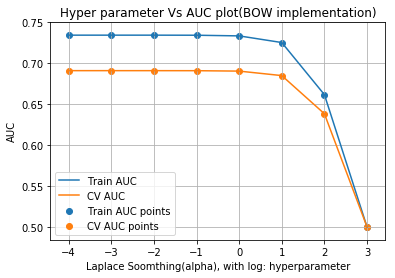

In [41]:
results_gs = results_gs.sort_values(['param_alpha'])
train_auc= results_gs['mean_train_score']
train_auc_std= results_gs['std_train_score']
cv_auc = results_gs['mean_test_score'] 
cv_auc_std= results_gs['std_test_score']
laplaceS_alpha =  results_gs['param_alpha']
laplaceS_alpha = list(map(lambda x: np.log10(x),laplaceS_alpha))
plt.plot(laplaceS_alpha, train_auc, label='Train AUC')
plt.plot(laplaceS_alpha, cv_auc, label='CV AUC')
plt.scatter(laplaceS_alpha, train_auc, label='Train AUC points')
plt.scatter(laplaceS_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Laplace Soomthing(alpha), with log: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot(BOW implementation)")
plt.grid()
plt.show()

In [0]:
# from sklearn.model_selection import RandomizedSearchCV
# mnb = MultinomialNB()
# clf = RandomizedSearchCV(mnb,parameters,cv=4,scoring='roc_auc',return_train_score=True)
# clf.fit(X_tr,y_train)
# results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_alpha'])
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# laplaceS_alpha =  results['param_alpha']
# laplaceS_alpha = list(map(lambda x: np.log10(x),laplaceS_alpha))
# plt.plot(laplaceS_alpha, train_auc, label='Train AUC')
# plt.plot(laplaceS_alpha, cv_auc, label='CV AUC')
# plt.scatter(laplaceS_alpha, train_auc, label='Train AUC points')
# plt.scatter(laplaceS_alpha, cv_auc, label='CV AUC points')

# plt.legend()
# plt.xlabel("Laplace Soomthing(alpha), with log: hyperparameter")
# plt.ylabel("AUC")
# plt.title("Hyper parameter Vs AUC plot(BOW implementation)")
# plt.grid()
# plt.show()

# results.head()

# Observation BOW Implementation 
1. Gap between Train AUC and CV AUC is less when alpha is 100

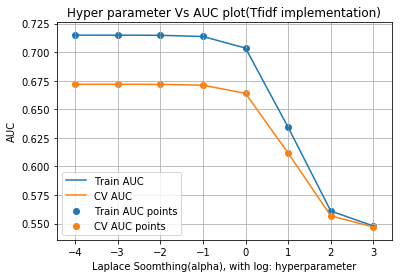

In [44]:
mnb_tfidf = MultinomialNB()
clf = GridSearchCV(mnb_tfidf,parameters,cv=4,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr2,y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
laplaceS_alpha =  results['param_alpha']
laplaceS_alpha = list(map(lambda x: np.log10(x),laplaceS_alpha))
plt.plot(laplaceS_alpha, train_auc, label='Train AUC')
plt.plot(laplaceS_alpha, cv_auc, label='CV AUC')
plt.scatter(laplaceS_alpha, train_auc, label='Train AUC points')
plt.scatter(laplaceS_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Laplace Soomthing(alpha), with log: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot(Tfidf implementation)")
plt.grid()
plt.show()

#results.head(2)

# Observatoin Tfidf implementation
1. Gap between Train AUC and CV AUC is less when alpha is 10, 100 and 1000
2. choosing alpha = 10, as gap is low and AUC is high than others.

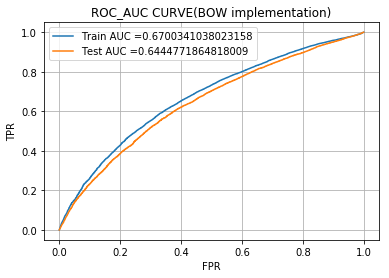

In [46]:
from sklearn.metrics import roc_curve, auc
mnb = MultinomialNB(alpha=100)
mnb.fit(X_tr,y_train)

y_train_pred =  mnb.predict_proba(X_tr)[:,1] #mnb.predict(X_tr,)
y_test_pred = mnb.predict_proba(X_te)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE(BOW implementation)")
plt.grid()
plt.show()

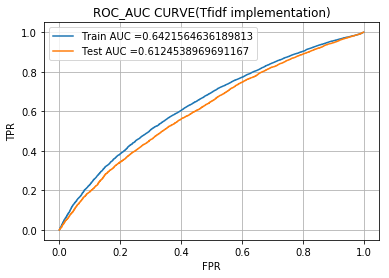

In [47]:
from sklearn.metrics import roc_curve, auc
mnb2 = MultinomialNB(alpha=10)
mnb2.fit(X_tr2,y_train)

y_train_pred2 = mnb2.predict_proba(X_tr2)[:,1]
y_test_pred2 = mnb2.predict_proba(X_te2)[:,1]

train_fpr2, train_tpr2, tr_thresholds2 = roc_curve(y_train, y_train_pred2)
test_fpr2, test_tpr2, te_thresholds2 = roc_curve(y_test, y_test_pred2)

plt.plot(train_fpr2, train_tpr2, label="Train AUC ="+str(auc(train_fpr2, train_tpr2)))
plt.plot(test_fpr2, test_tpr2, label="Test AUC ="+str(auc(test_fpr2, test_tpr2)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE(Tfidf implementation)")
plt.grid()
plt.show()

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Confution Matrix (BOW implementation)

In [50]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.3951663283586649 for threshold 1.0
Train confusion matrix
[[ 4828  2598]
 [16321 25294]]
Test confusion matrix
[[ 3361  2098]
 [12016 18577]]


# Confution Matrix (Tfidf implementation)

In [52]:
from sklearn.metrics import confusion_matrix
best_t2 = find_best_threshold(tr_thresholds2, train_fpr2, train_tpr2)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred2, best_t2)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred2, best_t2)))

the maximum value of tpr*(1-fpr) 0.3643843558579296 for threshold 0.944
Train confusion matrix
[[ 4663  2763]
 [17466 24149]]
Test confusion matrix
[[ 3175  2284]
 [12995 17598]]


# Top 20 features (BOW implementaion)

In [0]:
abs_val_feature_log_prob = [abs(x) for x in mnb.feature_log_prob_[0]] #Converts every value to abs value

In [0]:
#mnb.feature_log_prob_[0].argmax()
top20features_arg = sorted(range(len(abs_val_feature_log_prob)), key=lambda i: abs_val_feature_log_prob[i])[-20:]

In [56]:
print("Index of the top 20 features")
print(sorted(top20features_arg))

Index of the top 20 features
[470, 590, 642, 644, 757, 1777, 3964, 4416, 4441, 4455, 4457, 4464, 4685, 5026, 5028, 5039, 5046, 5050, 5051, 5077]


In [0]:
allFeatures = vectorizer_essay.get_feature_names() + vectorizer_cc.get_feature_names()+vectorizer_cs.get_feature_names() \
              + vectorizer_pgc.get_feature_names()+vectorizer_ss.get_feature_names()+vectorizer_tp.get_feature_names()  

In [78]:
top20features = []
for i in top20features_arg:
  top20features.append(allFeatures[i])
print("Top 20 Features in case of BOW implementation")
top20features

Top 20 Features in case of BOW implementation


['these chromebooks',
 'chairs help',
 'chromebooks students',
 'the chromebooks',
 'grades_3_5',
 'ny',
 'chromebooks allow',
 'color printer',
 'graphing',
 'these chairs',
 'using ipads',
 'these stools',
 'boogie',
 'stools allow',
 'literacy',
 'the wobble',
 'az',
 'dc',
 'mathematics',
 'de']

# Top 20 features (Tfidf implementation)

In [0]:
abs_val_feature_log_prob_tfidf = [abs(x) for x in mnb2.feature_log_prob_[0]] #Converts every value to abs value

In [0]:
top20features_arg_tfidf = sorted(range(len(abs_val_feature_log_prob_tfidf)), key=lambda i: abs_val_feature_log_prob_tfidf[i])[-20:]

In [70]:
print("Index of the top 20 features")
print(sorted(top20features_arg_tfidf))

Index of the top 20 features
[385, 470, 489, 589, 590, 642, 643, 644, 757, 912, 1777, 2134, 3584, 3964, 4416, 4441, 4455, 4457, 4464, 4685]


In [0]:
allFeatures_tfidf = vectorizer2_essay.get_feature_names() + vectorizer_cc.get_feature_names()+vectorizer_cs.get_feature_names() \
                    + vectorizer_pgc.get_feature_names()+vectorizer_ss.get_feature_names()+vectorizer_tp.get_feature_names()  

In [80]:
top20features_tfidf = []
for i in top20features_arg_tfidf:
  top20features_tfidf.append(allFeatures[i])
print("Top 20 Features in case of Tfidf implementation")
top20features

Top 20 Features in case of Tfidf implementation


['these chromebooks',
 'chairs help',
 'chromebooks students',
 'the chromebooks',
 'grades_3_5',
 'ny',
 'chromebooks allow',
 'color printer',
 'graphing',
 'these chairs',
 'using ipads',
 'these stools',
 'boogie',
 'stools allow',
 'literacy',
 'the wobble',
 'az',
 'dc',
 'mathematics',
 'de']

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

<table>
  <tr>
  <th>Vectorizer</th>
  <th>Model</th>
  <th>Hyper Parameter</th>
  <th>AUC</th>
  </tr>
  <tr>
  <td>BOW</td>
  <td>GridSearch</td>
  <td>100</td>
  <td>0.64</td>
  </tr>
  <tr>
  <td>Tfidf</td>
  <td>GridSearch</td>
  <td>10</td>
  <td>0.61</td>
  </tr>
</table>